In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [50]:
data = pd.read_csv('./data/기온.csv', engine='python')

In [51]:
data.head()

,지점,일시,평균,최고,최저
0,90,1968-01-01,-0.7,11.4,-11.4
1,90,1968-02-01,-2.1,9.7,-9.9
2,90,1968-03-01,5.9,20.5,-3.2
3,90,1968-04-01,10.5,21.4,4.0
4,90,1968-05-01,14.6,24.5,9.3


In [52]:
len(data)

45555

In [53]:
area = pd.read_csv('./data/지점정보.csv', engine='python')

In [54]:
area.head()

,지점,지점명,위도,경도
0,3,선봉,42.3167,130.4000
1,5,삼지연,41.8167,128.3167
2,8,청진,41.7833,129.8167
3,14,중강,41.7833,126.8833
4,16,혜산,41.4000,128.1667


In [55]:
len(area)

4272

In [87]:
df_area = data['지점'].drop_duplicates().tolist()

In [57]:
len(df_area)

102

In [33]:
len(df_area)

102

In [88]:
area3 = area[area['지점'].isin(df_area)]
area3.head()

,지점,지점명,위도,경도
27,90,속초,38.2509,128.5647
29,93,북춘천,37.9475,127.7547
30,93,북춘천,37.9474,127.7544
32,95,철원,38.1479,127.3042
34,98,동두천,37.9019,127.0607


In [89]:
df_area3 = pd.DataFrame(area3['지점'].duplicated())

In [90]:
df_area3.head()

,지점
27,False
29,False
30,True
32,False
34,False


In [91]:
df_area3 = df_area3.rename(columns={'지점':'중복'})
df_area3.head()

,중복
27,False
29,False
30,True
32,False
34,False


In [92]:
area3 = pd.concat([area3, df_area3], axis=1)
area3.head()

,지점,지점명,위도,경도,중복
27,90,속초,38.2509,128.5647,False
29,93,북춘천,37.9475,127.7547,False
30,93,북춘천,37.9474,127.7544,True
32,95,철원,38.1479,127.3042,False
34,98,동두천,37.9019,127.0607,False


In [93]:
area4 = area3[area3['중복']==False]
len(area4)

102

In [94]:
df = pd.merge(data, area4, on='지점', how='inner')

In [95]:
df.head()

,지점,일시,평균,최고,최저,지점명,위도,경도,중복
0,90,1968-01-01,-0.7,11.4,-11.4,속초,38.2509,128.5647,False
1,90,1968-02-01,-2.1,9.7,-9.9,속초,38.2509,128.5647,False
2,90,1968-03-01,5.9,20.5,-3.2,속초,38.2509,128.5647,False
3,90,1968-04-01,10.5,21.4,4.0,속초,38.2509,128.5647,False
4,90,1968-05-01,14.6,24.5,9.3,속초,38.2509,128.5647,False


In [96]:
len(df)

45555

In [97]:
df = df.drop('중복', axis=1)
df.head()

,지점,일시,평균,최고,최저,지점명,위도,경도
0,90,1968-01-01,-0.7,11.4,-11.4,속초,38.2509,128.5647
1,90,1968-02-01,-2.1,9.7,-9.9,속초,38.2509,128.5647
2,90,1968-03-01,5.9,20.5,-3.2,속초,38.2509,128.5647
3,90,1968-04-01,10.5,21.4,4.0,속초,38.2509,128.5647
4,90,1968-05-01,14.6,24.5,9.3,속초,38.2509,128.5647


In [98]:
df.to_excel('./data/기온데이터정보.xlsx')

In [102]:
df['일시'] = pd.to_datetime(df['일시'])

In [103]:
df['년'ㅇㄹ] = df['일시'].dt.year 

In [104]:
df['월']=df['일시'].dt.month

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45555 entries, 0 to 45554
Data columns (total 10 columns):
지점     45555 non-null int64
일시     45555 non-null datetime64[ns]
평균     45093 non-null float64
최고     45554 non-null float64
최저     45551 non-null float64
지점명    45555 non-null object
위도     45555 non-null float64
경도     45555 non-null float64
년      45555 non-null int64
월      45555 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 3.8+ MB


In [106]:
df2 = df.groupby(['지점명','년'])['평균','최고','최저'].mean()

In [108]:
df2 = df2.reset_index()
df2.head()

,지점명,년,평균,최고,최저
0,강릉,1960,15.900000,26.933333,5.133333
1,강릉,1961,13.600000,25.433333,3.083333
2,강릉,1962,12.658333,25.258333,2.783333
3,강릉,1963,11.591667,23.191667,1.941667
4,강릉,1964,11.966667,24.325000,2.908333


In [115]:
df3 = df2.pivot('년','지점명', '평균')
df3 = df3.reset_index()
df3

지점명,년,강릉,강진군,강화,거제,거창,경주시,고산,고창,고창군,...,태백,통영,파주,포항,함양군,합천,해남,홍성,홍천,흑산도
0,1960,15.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,17.050000,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,13.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.141667,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,12.658333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.408333,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,11.591667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.350000,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,11.966667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.558333,NaN,NaN,NaN,NaN,NaN,NaN
5,1965,12.208333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.925000,NaN,NaN,NaN,NaN,NaN,NaN
6,1966,12.225000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.941667,NaN,NaN,NaN,NaN,NaN,NaN
7,1967,12.408333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.100000,NaN,NaN,NaN,NaN,NaN,NaN
8,1968,12.208333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.650000,NaN,12.816667,NaN,NaN,NaN,NaN,NaN,NaN
9,1969,12.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.216667,NaN,12.683333,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
df4 = df3.loc[:, ['년','부산', '서울','대전','제주']]

In [126]:
df4 = df4[(df4['년'] >= 2000) & (df4['년'] != 2019) ]

df4 = df4.set_index('년')
df4

지점명,부산,서울,대전,제주
년,,,,
2000,14.908333,12.675000,12.408333,15.658333
2001,15.325000,12.800000,13.050000,16.050000
2002,14.666667,12.858333,13.316667,15.833333
2003,14.308333,12.825000,13.233333,15.741667
2004,14.883333,13.316667,13.866667,16.433333
2005,13.833333,12.075000,12.350000,16.208333
2006,14.650000,12.983333,13.083333,16.233333
2007,15.300000,13.250000,13.266667,16.458333
2008,14.983333,12.908333,12.975000,16.016667


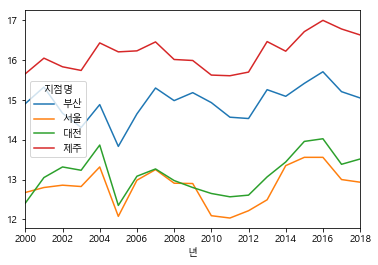

In [127]:
df4.plot()
plt.show()

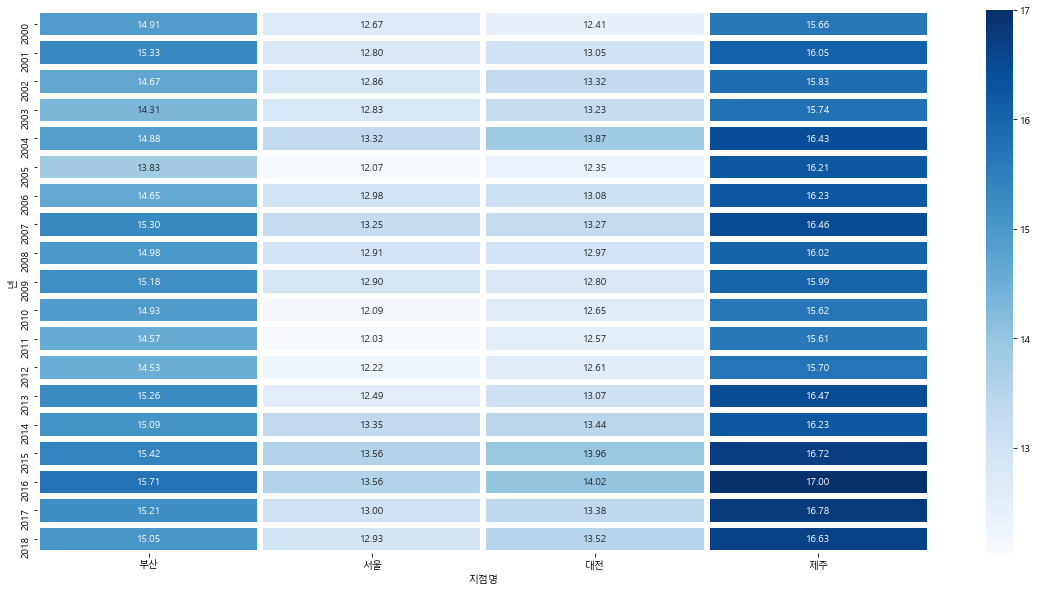

In [128]:
import seaborn as sns 

plt.figure(figsize=(20,10))
sns.heatmap(data=df4, annot=True, fmt='.2f', linewidths=5, cmap='Blues')
plt.show()